<a href="https://colab.research.google.com/github/Witcape/Convolution-WITH-WITHOUT-sklearn-digit-recognition.ipynb/blob/main/Digit_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import tqdm
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from PIL import Image
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def zero_pad(X,pad):
  #X_pad = np.pad( Dataset, ( Number of Images ), ( Padding in Height ), ( Padding in Width ), ( Number of Color Channels))
  x_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)))
  return x_pad

In [4]:
np.random.seed(1)
x = np.random.randn(4, 3, 2, 2)
pad = 3
x_pad = zero_pad(x, pad)
print("Shape of x is ",x.shape, "\nShape of x_pad is ",x_pad.shape)

Shape of x is  (4, 3, 2, 2) 
Shape of x_pad is  (4, 9, 8, 2)


In [5]:
data_dir = '/content/drive/MyDrive/dataset'

features = []
labels = []

for label in range(10):
  loc = os.path.join(data_dir,f'digit_{label}')
  for file_name in tqdm(os.listdir(loc)):
    name = os.path.join(loc,file_name)
    image = cv2.imread(name,0)
    features.append(image)
    labels.append(label)

100%|██████████| 874/874 [00:27<00:00, 31.41it/s] 


In [6]:
X = np.array(features)
Y = np.array(labels)

<ipython-input-6-7d9274bffe07>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(features)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

(4820,) 
 (4820,)


Text(0.5, 1.0, 'Label = 7')

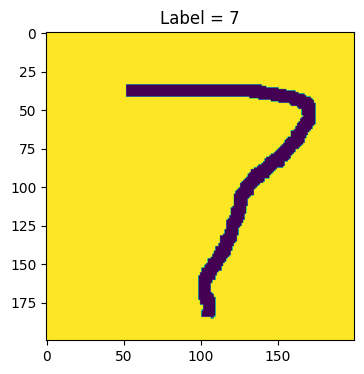

In [16]:
#visualising data
print(x_train.shape, "\n",y_train.shape)
plt.figure(figsize=(4,4))
plt.imshow(x_train[300])
plt.title(f'Label = {y_train[300]}')

In [17]:
x_train = x_train/255
y_train = y_train/255

In [20]:
conv_layers = {}

In [1]:
def create_placeholders(h, w, c, y):
  X = tf.placeholder([None, h, w, c], dtype = "float", name = "X")
  Y = tf.placeholder([None, y], dtype = "float", name = "Y")
  return X,Y

In [ ]:
height = 32
width = 32
p_x = create_placeholders()